In [ ]:
### THE PLAN
# Use scripts instead of having two-four noteboooks (Organization)
# GITHUB!
# Individual Plans:
# PROBLEM 1:
## Plot the horizontal wings on one plot (height vs. time)
## Plot the vertical winds on another plot (height vs. time)
## Ask to make sure this is a good plan lol ^
# PROBLEM 2:
## 5/6/2024 -- High risk didn't pan out in daytime
## Refresh on best practices before retrieval!!
## Analyze!
# PROBLEM 3:
## This one's fairly linear.
## Refresh on what the class plots look like, double-check prior, make calculations, plot, QC, rinse/repeat


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    System: CLAMPS Doppler Lidar
    Date created: 2024-11-18T15:58:47.131577
    dimensions(sizes): time(15), height(400), rows(3), cols(3)
    variables(dimensions): float64 height(height), int64 base_time(), float32 rows(rows), float32 cols(cols), float64 time_offset(time), float64 hour(time), float32 u(time, height), float32 v(time, height), float32 w(time, height), float32 wspd(time, height), float32 wdir(time, height), float32 wspd_sigma(time, height), float32 wdir_sigma(time, height), float32 rms(time, height), float32 covariance_matrix(time, height, rows, cols), float32 cn(time, height), float32 r_sq(time, height), float32 intensity(time, height), float32 lat(time), float32 lon(time), float32 alt(time)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    System: CLAMPS Doppler Lidar
    Date created: 2024-11-18T15:50:24.067976
    dimensions(si

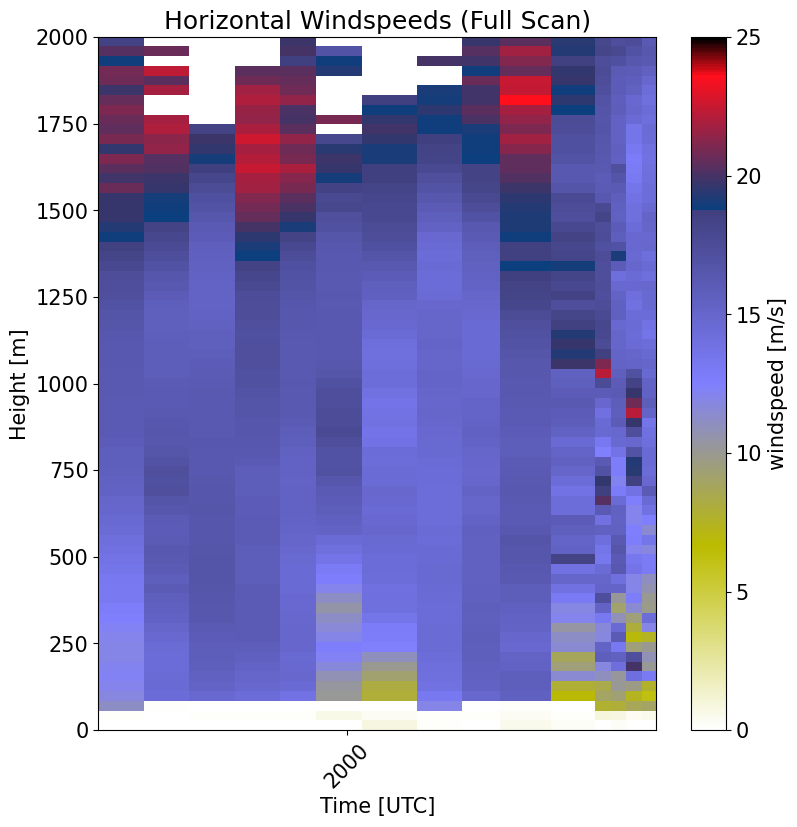

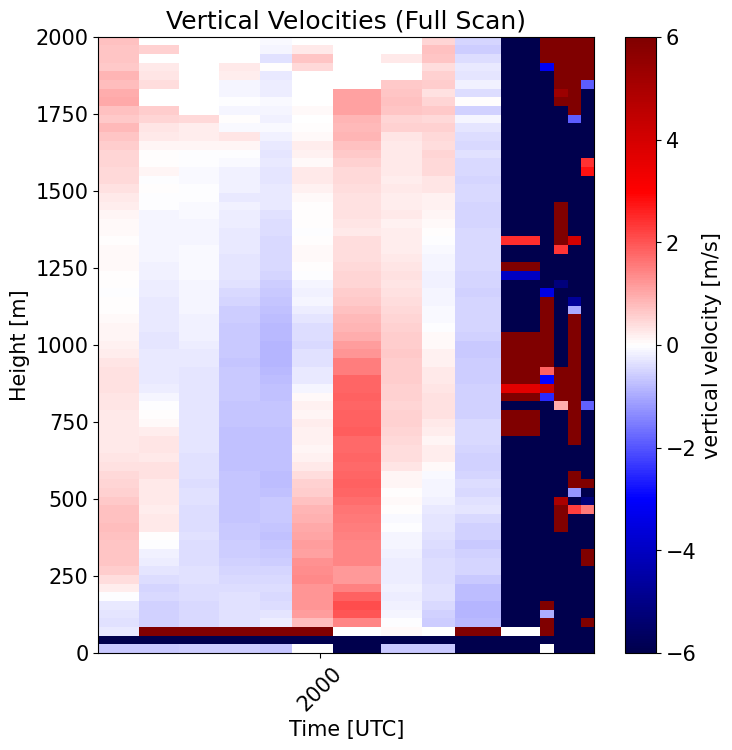

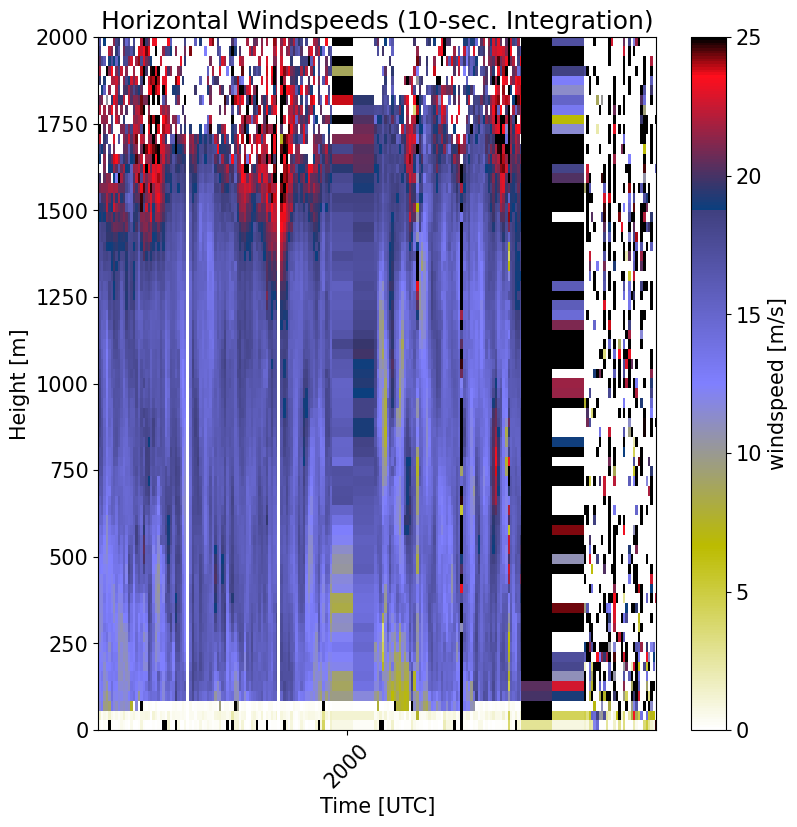

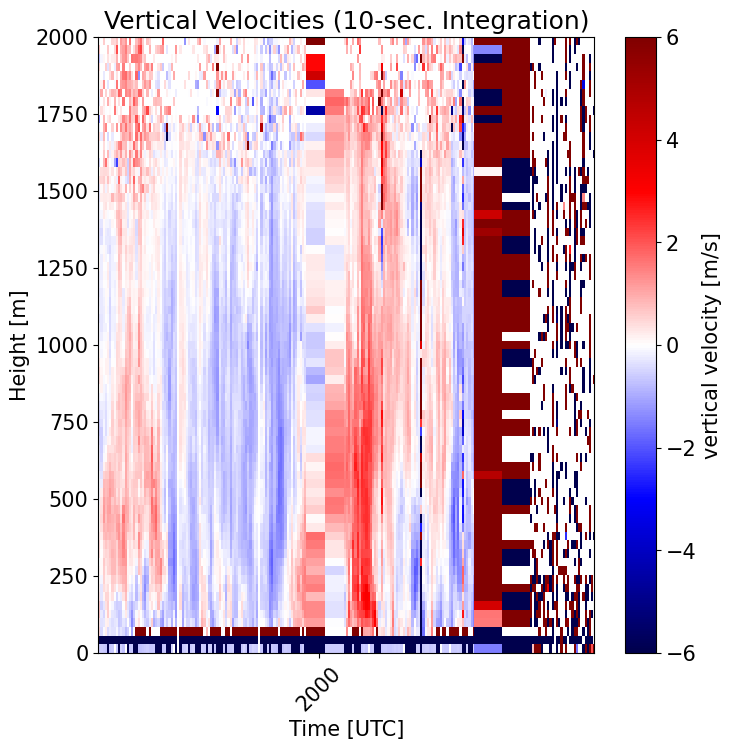

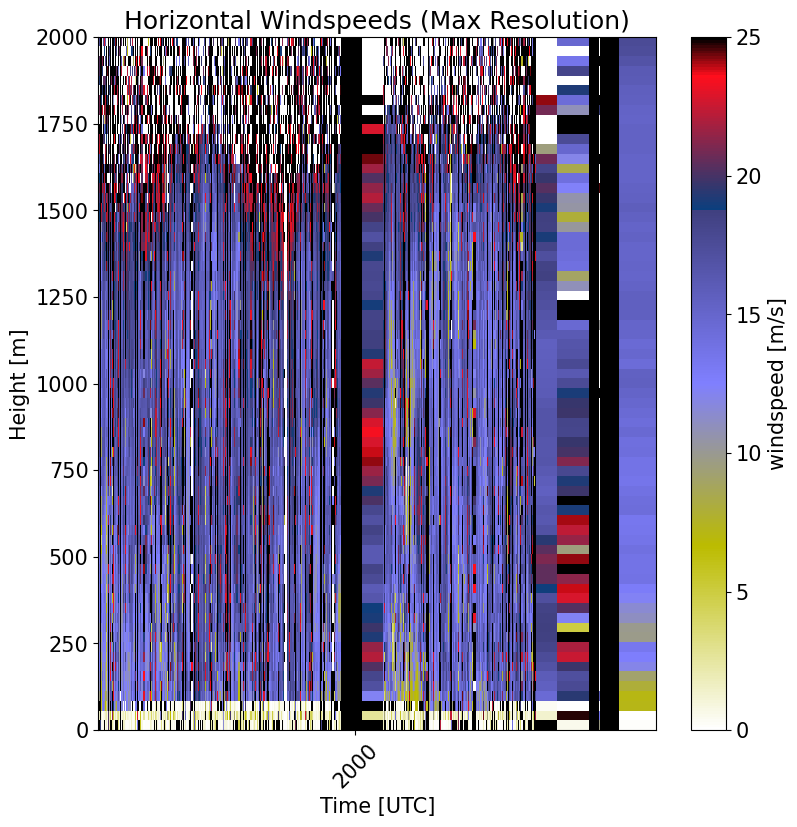

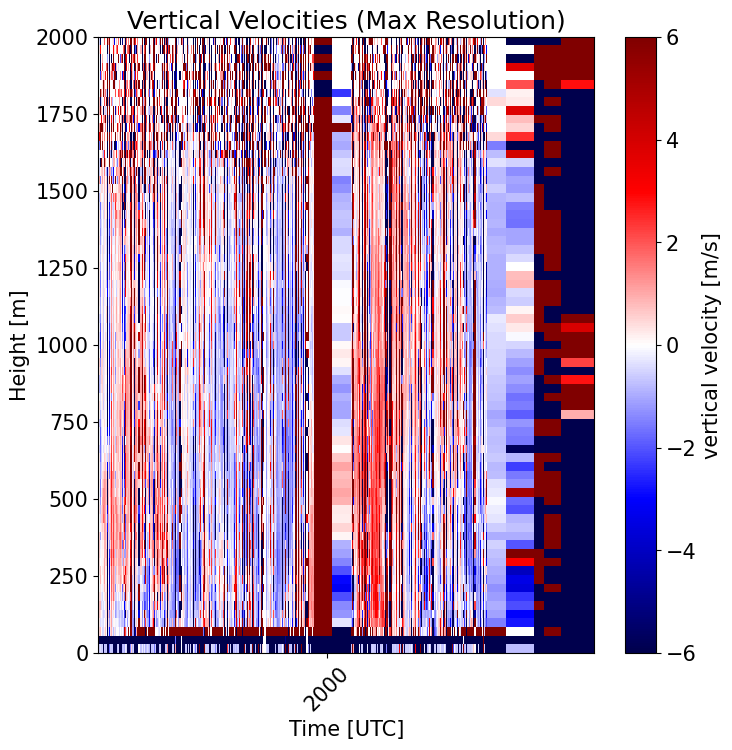

In [1]:
%run P1/HW4P1.py

interactive(children=(IntSlider(value=28, description='ind', max=56), Output()), _dom_classes=('widget-interac…

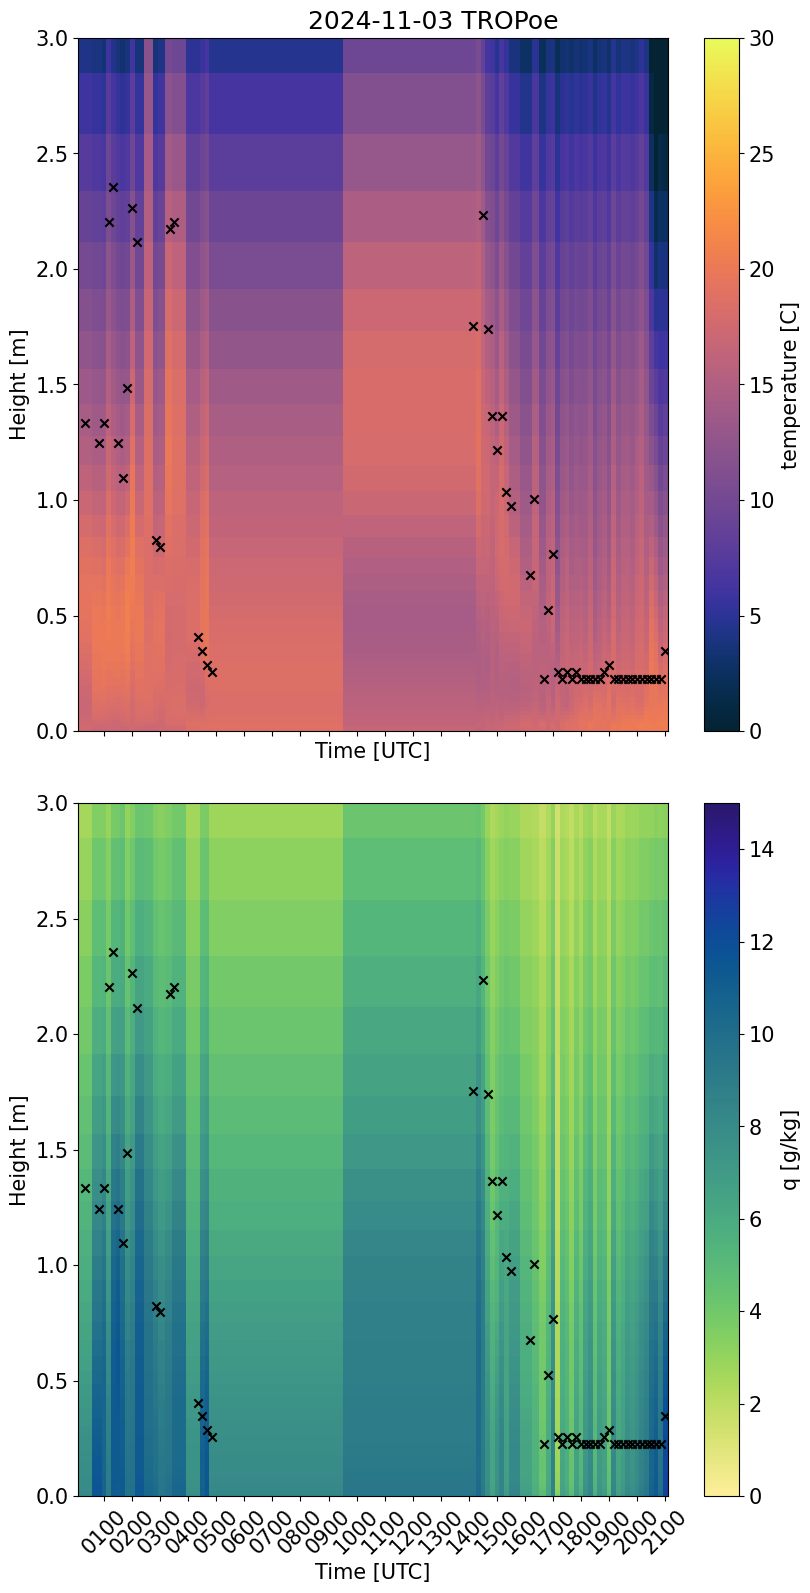

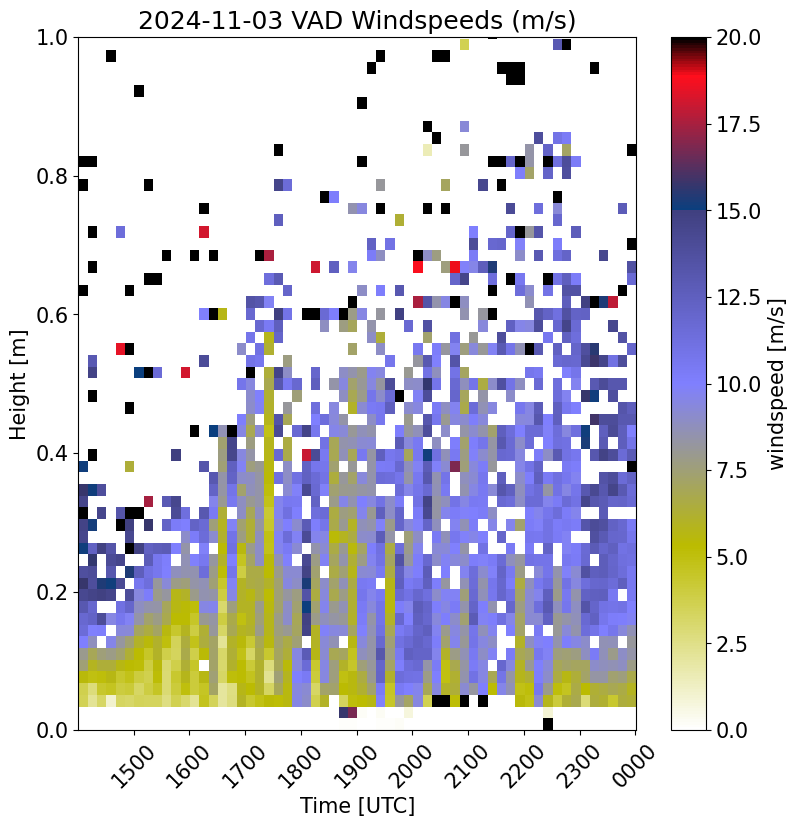

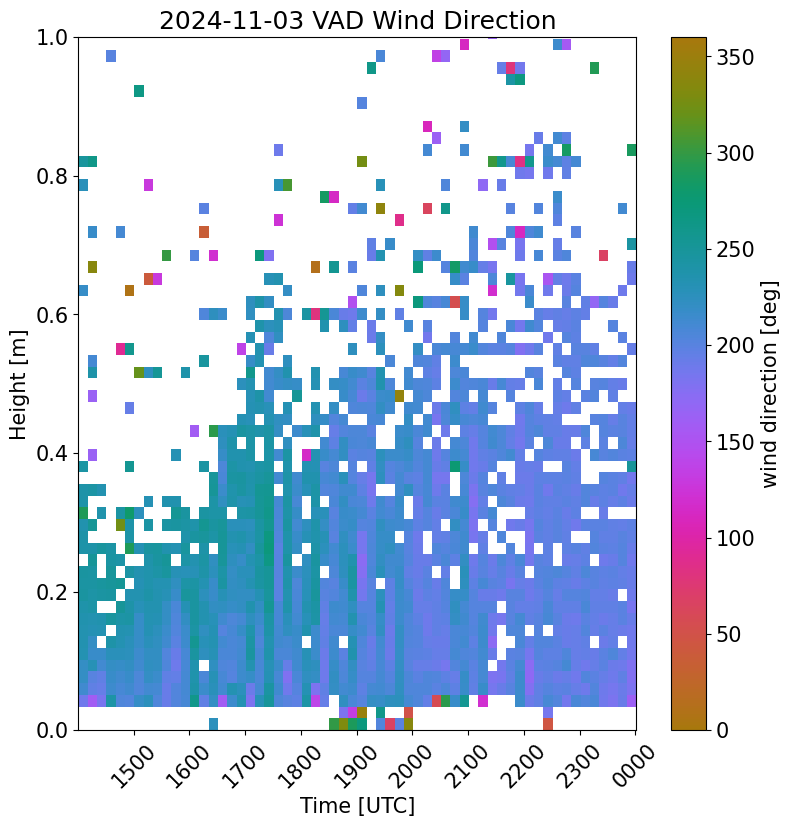

In [57]:
# Largely modified from Tyler Bell's CLAMPS-Demos codebase found here: https://github.com/TMBell05/CLAMPS-Demos/tree/main
from ipywidgets import interact

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from netCDF4 import Dataset

import cmocean
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

import cmocean.cm as cm

import os
# Same imports as HW4P1.py

# same cmaps as HW4P1.py
cmaps = {
    'w':  {'cm': 'seismic',   'label': 'vertical velocity [m/s]'},
    'wspd': {'cm': 'gist_stern_r',              'label': 'windspeed [m/s]'},
    'wdir': {'cm': cmocean.cm.phase,   'label': 'wind direction [deg]'},
    'pt': {'cm': cmocean.cm.thermal, 'label': 'potential temperature [C]'},
    't': {'cm': cmocean.cm.thermal, 'label': 'temperature [C]'},
    'q':  {'cm': cmocean.cm.haline_r,  'label': 'q [g/kg]'},
    'dp': {'cm': cmocean.cm.haline_r,  'label': 'dewpoint [C]'},
    'rh': {'cm': cmocean.cm.haline_r,  'label': 'RH [%]'},
    'std': {'cm': cmocean.cm.thermal,  'label': 'Standard Deviation'}
}

# Same as HW4P1.py
def timeheight(time, height, data, field, ax, datemin=None, datemax=None,
                datamin=None, datamax=None, zmin=None, zmax=None, cmap=None, **kwargs):
    '''
    Produces a time height plot of a 2-D field
    :param time: Array of times (1-D or 2-D but must have same dimenstions as height)
    :param height: Array of heights (1-D or 2-D but must have same dimensions as time)
    :param data: Array of the data to plot (2-D)
    :param field: Field being plotted. Currently supported:
        'w': Vertical Velocity
        'ws': Wind Speed
        'wd': Wind Direction
        'pt': Potential Temperature
        'q':  Specific Humidity
        'dp': Dewpoint
        'rh': Relative Humidity
        'std': Standard Deviation
    :param ax: Axis to plot the data to
    :param datemin: Datetime object
    :param datemax: Datetime object
    :param datamin: Minimum value of data to plot
    :param datamax: Maximum value of data to plot
    :param zmin: Minimum height to plot
    :param zmax: Maximum height to plot
    :return:
    '''

    # Get the colormap and label of the data
    if cmap is None:
        cm, cb_label = cmaps[field]['cm'], cmaps[field]['label']
    else:
        cm, cb_label = cmap, cmaps[field]['label']

    # Convert the dates to matplolib format if not done already
    if time.ndim == 1 and height.ndim == 1:
        time = mdates.date2num(time)
        time, height = np.meshgrid(time, height)

    # Create the plot
    c = ax.pcolormesh(time, height, data, vmin=datamin, vmax=datamax, cmap=cm, **kwargs)

    # Format the colorbar
    # c.cmap.set_bad('grey', 1.0)
    cb = plt.colorbar(c, ax=ax)
    cb.set_label(cb_label)

    # Format the limits
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H%M'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    if zmin is not None and zmax is not None:
        ax.set_ylim(zmin, zmax)
    if datemin is not None and datemax is not None:
        ax.set_xlim(mdates.date2num(np.array([datemin, datemax])))

    # Set the labels
    ax.set_ylabel('Height [m]')
    ax.set_xlabel('Time [UTC]')

    return ax

filename = 'P2/clampstropoe10.aeri.v0.C2.20241103.002005.nc'

data = Dataset(filename)
times = np.array([datetime.utcfromtimestamp(d) for d in data['base_time'][0]+data['time_offset'][:]]) # Courtesy Tyler Bell on GitHub (TROPoe_basics notebook)

@interact(ind=(0, data.dimensions['time'].size-1))
def doplot(ind):
    fig_t = plt.figure(figsize=(9,9))
    ax_t = plt.subplot(111)
    t_op = data['temperature'][:][ind]
    t_err = data['sigma_temperature'][:][ind, :]
    ax_t.cla()
    ax_t.plot(data['temperature'][:][ind], data['height'][:], color='maroon')
    ax_t.fill_betweenx(data['height'][:], t_op+t_err, t_op-t_err, color='maroon', alpha=.2)
    ax_t.set_ylim(0, 3)
    ax_t.set_xlim(0, 35)
    ax_t.grid()
    ax_t.set_xlabel("Temperature [C]")
    ax_t.set_ylabel("Height [km]")
    plt.suptitle(times[ind])
    plt.show()
    fig_t.savefig(filename.replace('.nc','_t.png'))
    plt.close(fig_t)
    fig_q = plt.figure(figsize=(9,9))
    ax_q = plt.subplot(111)
    w_op = data['waterVapor'][:][ind]
    w_err = data['sigma_waterVapor'][:][ind]
    ax_q.cla()
    ax_q.plot(data['waterVapor'][:][ind], data['height'][:], color='C0')
    ax_q.fill_betweenx(data['height'][:], w_op+w_err, w_op-w_err, color='C0', alpha=.2)
    ax_q.set_ylim(0, 3)
    ax_q.set_xlim(0, 15)   
    ax_q.grid()
    ax_q.set_xlabel("WVMR [g/kg]")
    ax_q.set_ylabel("Height [km]")
    plt.suptitle(times[ind])
    plt.show()
    fig_q.savefig(filename.replace('.nc','_q.png'))
    plt.close(fig_q)

heights = data['height'][:]
# Slightly modified from Tyler Bell's TROPoe advanced code
fig, (temp_ax, wvmr_ax) =  plt.subplots(2, sharex=True)
fig.set_figheight(16)
fig.set_figwidth(9)
fig.tight_layout(pad=2.5)
X, Y = np.meshgrid(times, heights)

timeheight(X, Y, data['temperature'][:].T, 't', temp_ax, zmin=0, zmax=3, datamin=0, datamax=30)
timeheight(X, Y, data['waterVapor'][:].T, 'q', wvmr_ax, zmin=0, zmax=3, datamin=0, datamax=15)

ind = np.where(data['cbh'] == 0)

temp_ax.scatter(times, data['cbh'][:], color='k', marker='x')
wvmr_ax.scatter(times, data['cbh'][:], color='k', marker='x')
plt.suptitle(times[0].strftime('%Y-%m-%d') + ' TROPoe')
fig.savefig(filename.replace('.nc','_adv.png')) # adv for advanced
plt.show()
plt.close(fig)
data.close()
## Done with TROPoe, onto VAD
# once again using Tyler Bell's CLAMPS-Demos workbook and modifying it, this time the VAD example
# Pulling from a file instead of the server directly
vad_filename = 'P2/clampsdlvadC2.c1.20201103.000000.cdf'
vad_data = Dataset(vad_filename)
vad_times = np.array([datetime.utcfromtimestamp(d) for d in vad_data['base_time'][0]+vad_data['time_offset'][:]]) # Courtesy Tyler Bell on GitHub (TROPoe_basics notebook)
vad_hour = vad_data.variables['hour'][:]
vad_wspd = vad_data.variables['wspd'][:]
vad_wdir = vad_data.variables['wdir'][:]
vad_hgt = vad_data.variables['height'][:]
vad_intensity = vad_data.variables['intensity'][:]
#print(vad_data)
vad_data.close()

foo = np.where(vad_intensity < 1.006)
vad_wspd[foo] = np.nan
vad_wdir[foo] = np.nan # don't need to break down u vs. v for this problem
fig_vad1 = plt.figure(figsize=(9,9))
ax_vad1 = plt.subplot(111)
vad_X, vad_Y = np.meshgrid(vad_times,vad_hgt)
timeheight(vad_X,vad_Y,vad_wspd.T,'wspd',ax_vad1,zmin=0,zmax=1,datamin=0,datamax=20) # maxes experimentally derived. Windspeed data really degrades past ~600m on average, useful data <20 m/s 
plt.title(times[0].strftime('%Y-%m-%d') + ' VAD Windspeeds (m/s)')
plt.show()
fig_vad1.savefig(vad_filename.replace('.cdf','_v.png'))
plt.close(fig_vad1)
fig_vad2 = plt.figure(figsize=(9,9))
ax_vad2 = plt.subplot(111)
timeheight(vad_X,vad_Y,vad_wdir.T,'wdir',ax_vad2,zmin=0,zmax=1,datamin=0,datamax=360) # same zmax reasoning as before
plt.title(times[0].strftime('%Y-%m-%d') + ' VAD Wind Direction')
plt.show()
fig_vad2.savefig(vad_filename.replace('.cdf','_dir.png'))
plt.close(fig_vad2)
# Done!

/home/jovyan/HW4/P3/homework3.py:38: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  times = np.array([datetime.utcfromtimestamp(d) for d in mwr_nc['base_time'][0]+mwr_nc['time_offset'][:]])


1.0000000000000002
iter is 0 di2m is 9000000000.0 and RMS is 1.4146773332434497
Converged!


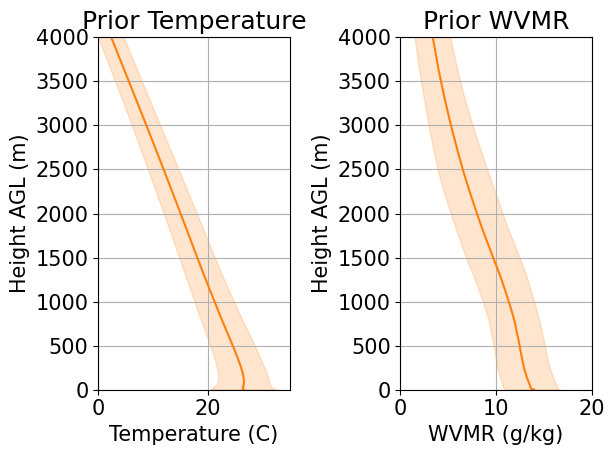

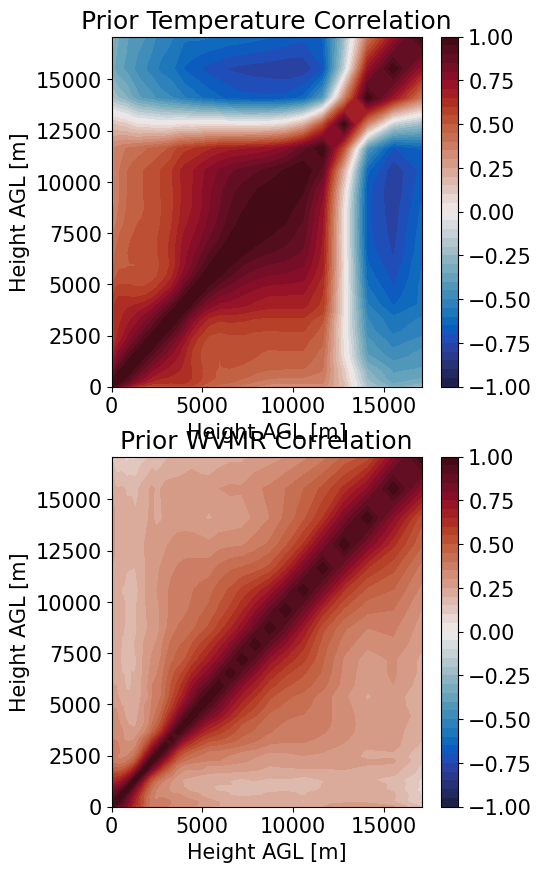

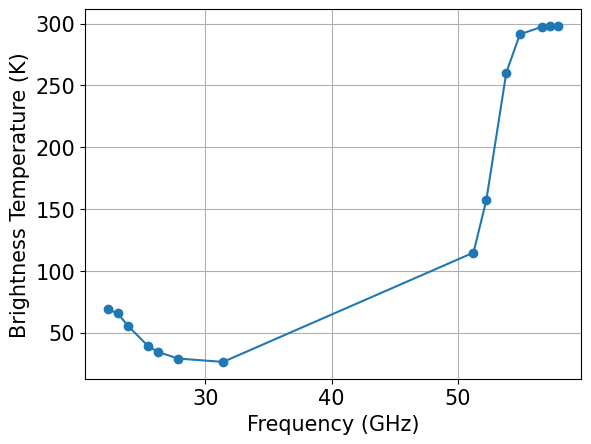

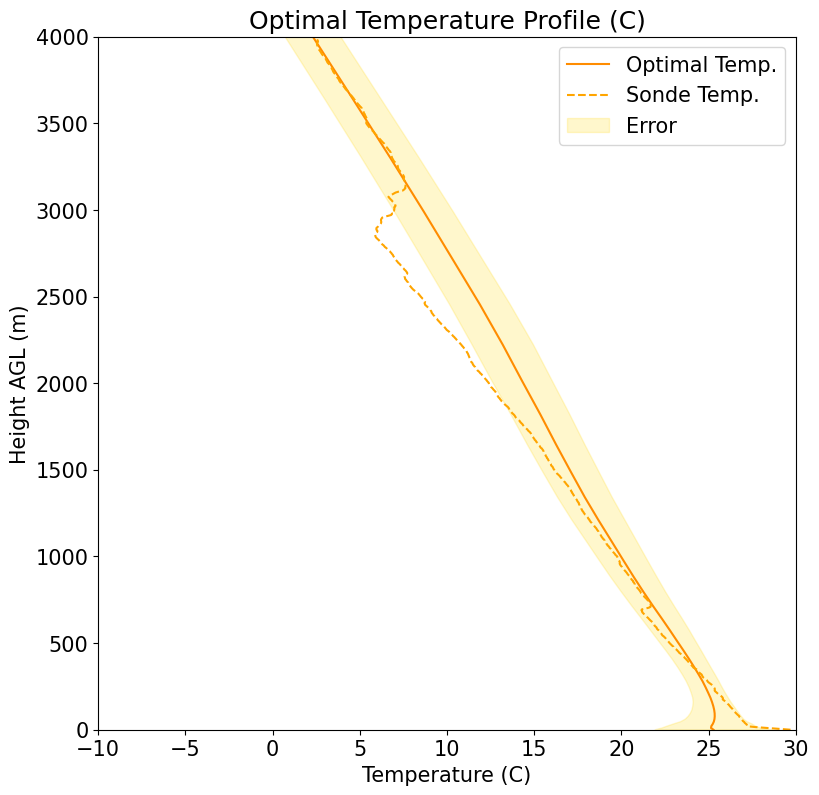

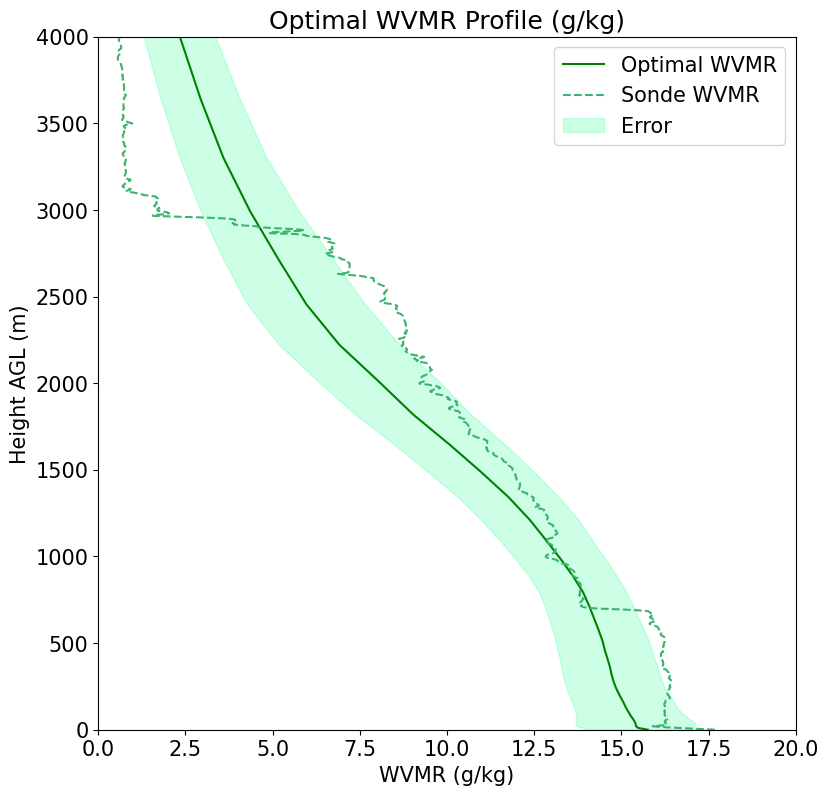

In [14]:
%run P3/homework3.py